<a href="https://colab.research.google.com/github/Kae1thas/ML-24/blob/main/%D0%98%D0%A12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Загрузка данных

In [ ]:
import numpy as np

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = np.genfromtxt(url, delimiter=",")

print(data[:5])

[[5.1 3.5 1.4 0.2 nan]
 [4.9 3.  1.4 0.2 nan]
 [4.7 3.2 1.3 0.2 nan]
 [4.6 3.1 1.5 0.2 nan]
 [5.  3.6 1.4 0.2 nan]]


## 2. Анализ структуры данных

In [ ]:
structured_data = np.genfromtxt(
    url,
    delimiter=",",
    dtype=[('sepal_length', 'f8'),
           ('sepal_width', 'f8'),
           ('petal_length', 'f8'),
           ('petal_width', 'f8'),
           ('class', 'U20')],
    encoding=None
)

print(structured_data[:5])


[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') (4.9, 3. , 1.4, 0.2, 'Iris-setosa')
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa') (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
 (5. , 3.6, 1.4, 0.2, 'Iris-setosa')]


# 3. Анализ типов данных

In [ ]:
labels = structured_data['class']
print("Метки классов:", np.unique(labels))


Метки классов: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# 4. Визуализация данных

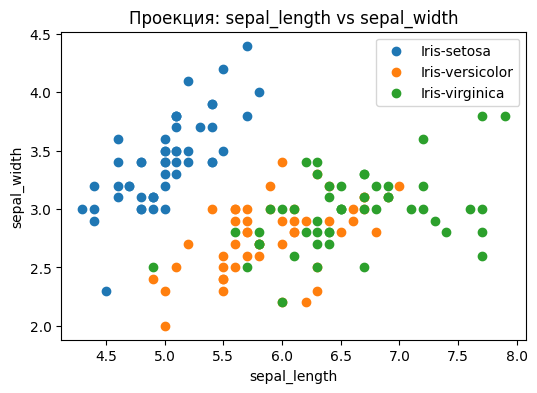

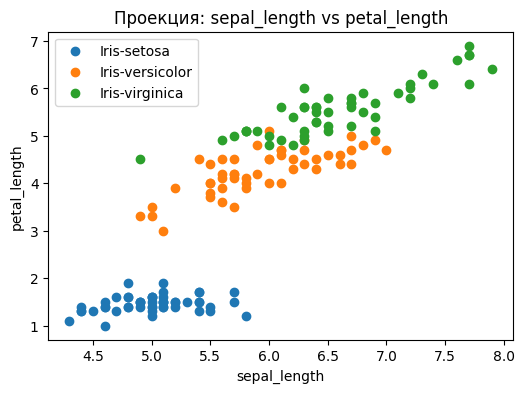

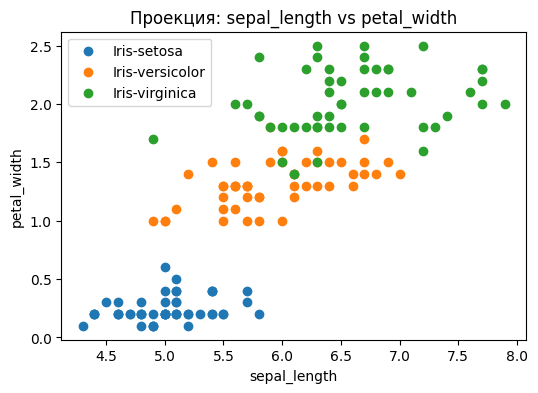

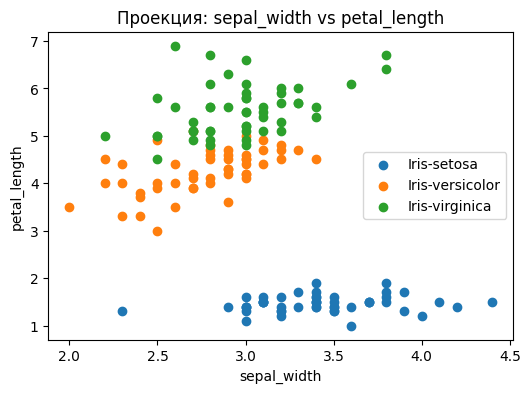

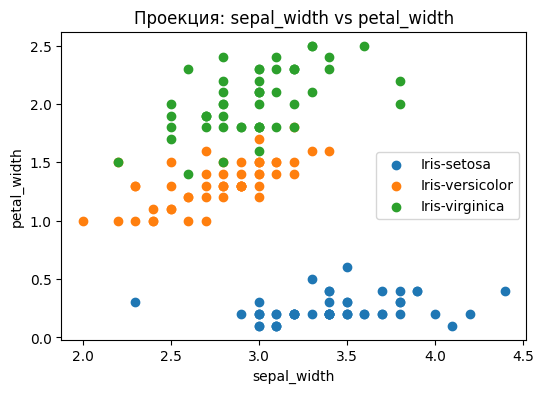

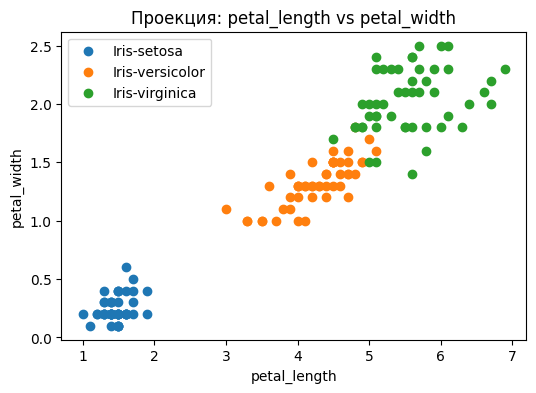

In [ ]:
import matplotlib.pyplot as plt

numerical_data = np.array([
    [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]
    for row in structured_data
])

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Построение парных графиков
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(6, 4))
        for label in np.unique(labels):
            plt.scatter(
                numerical_data[labels == label, i],
                numerical_data[labels == label, j],
                label=label
            )
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend()
        plt.title(f"Проекция: {features[i]} vs {features[j]}")
        plt.show()


# Индивидуальное задание

1. Проведите первичный анализ данных. Предоставить информацию о наборе данных требуемую ниже.
2. Описание набора данных, пояснения, позволяющие лучше понять природу данных. Назначение набора данных и возможные модели, которые можно построить на основе данного набора данных (практические задачи, решаемые с использованием данного обучающего набора данных). Описание каждого признака и его тип.
3. Форма набора данных: количество элементов набора, количество признаков, количество пропущенных значений, среднее значение отдельных признаков, максимальные и минимальные значения отдельных признаков и прочие показатели. Предположения, которые можно сделать, проведя первичный анализ.
4. Графические представления, позволяющие судить о неоднородности исследуемого набора данных. Построение графиков желательно произвести по нескольким проекциям.


## Шаг 1: Загрузка и описание данных

In [ ]:
# Импорт необходимых библиотек
import numpy as np  # работа с массивами и матрицами
import pandas as pd  # работа с таблицами данных
import matplotlib.pyplot as plt  # базовая визуализация данных
import seaborn as sns  # расширенная визуализация данных

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
data = pd.read_csv(url, header=None)
data.columns = ['class', 'left_weight', 'left_distance', 'right_weight', 'right_distance']

# Описание данных
print("Описание набора данных:")
print(data.head())
print("\nРазмер данных:", data.shape)


Описание набора данных:
  class  left_weight  left_distance  right_weight  right_distance
0     B            1              1             1               1
1     R            1              1             1               2
2     R            1              1             1               3
3     R            1              1             1               4
4     R            1              1             1               5

Размер данных: (625, 5)


## Шаг 2: Проверка типов данных и пропущенных значений

In [ ]:
# Типы данных
print("\nТипы данных:")
print(data.dtypes)

# Проверка на пропущенные значения
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

# Описание классов
print("\nРаспределение классов:")
print(data['class'].value_counts())



Типы данных:
class             object
left_weight        int64
left_distance      int64
right_weight       int64
right_distance     int64
dtype: object

Количество пропущенных значений:
class             0
left_weight       0
left_distance     0
right_weight      0
right_distance    0
dtype: int64

Распределение классов:
class
R    288
L    288
B     49
Name: count, dtype: int64


## Шаг 3: Преобразование категориального признака class в числовой формат

In [ ]:
# Преобразование классов в числовые значения
class_mapping = {'L': 0, 'B': 1, 'R': 2}
data_numeric = data.copy()
data_numeric['class'] = data['class'].map(class_mapping)

# Проверка преобразования
print("Пример данных после преобразования классов:")
print(data_numeric.head())


Пример данных после преобразования классов:
   class  left_weight  left_distance  right_weight  right_distance
0      1            1              1             1               1
1      2            1              1             1               2
2      2            1              1             1               3
3      2            1              1             1               4
4      2            1              1             1               5


## Шаг 4: Статистический анализ

In [ ]:
# Статистические показатели
print("\nСтатистическое описание числовых признаков:")
print(data_numeric.describe())



Статистическое описание числовых признаков:
            class  left_weight  left_distance  right_weight  right_distance
count  625.000000   625.000000     625.000000    625.000000      625.000000
mean     1.000000     3.000000       3.000000      3.000000        3.000000
std      0.960769     1.415346       1.415346      1.415346        1.415346
min      0.000000     1.000000       1.000000      1.000000        1.000000
25%      0.000000     2.000000       2.000000      2.000000        2.000000
50%      1.000000     3.000000       3.000000      3.000000        3.000000
75%      2.000000     4.000000       4.000000      4.000000        4.000000
max      2.000000     5.000000       5.000000      5.000000        5.000000


## Шаг 5: Построение распределения классов

<ipython-input-10-bfa0c88d8012>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')


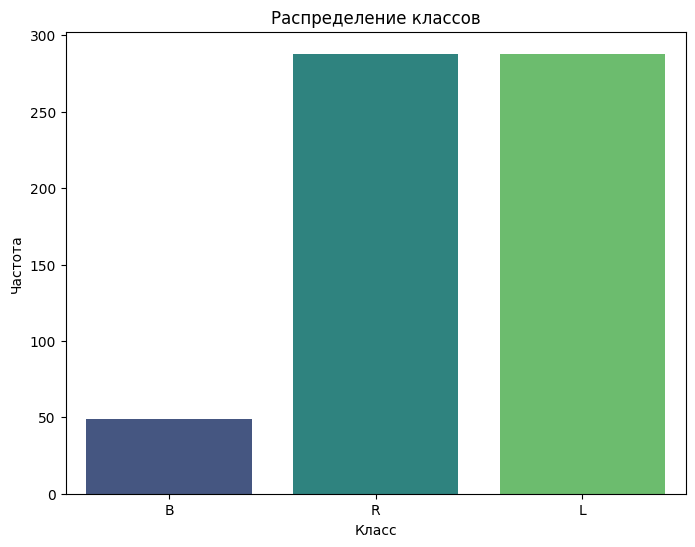

In [ ]:
# Построение распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='viridis')
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Частота")
plt.show()

## Шаг 6: Матрица корреляций

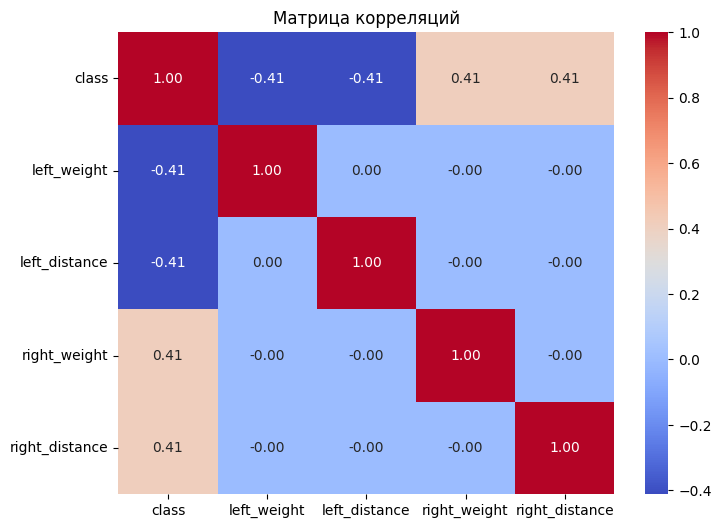

In [ ]:
# Матрица корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()


## Шаг 7: Гистограммы признаков

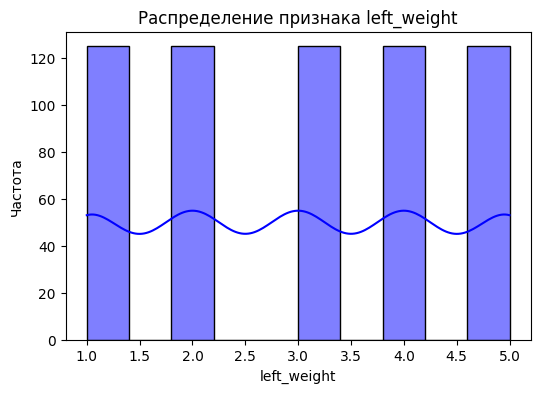

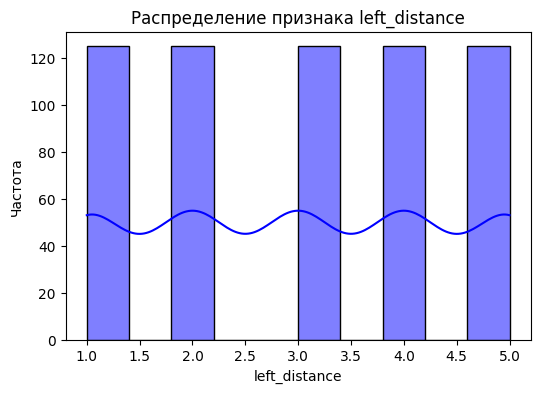

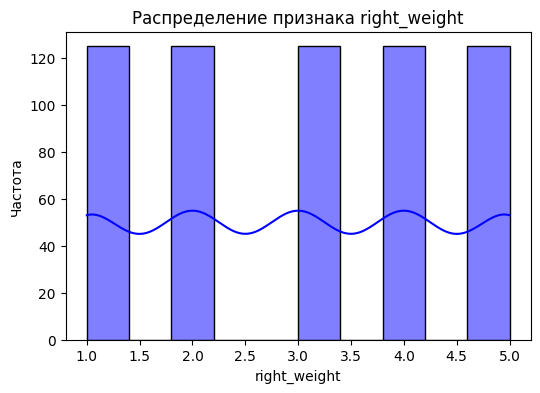

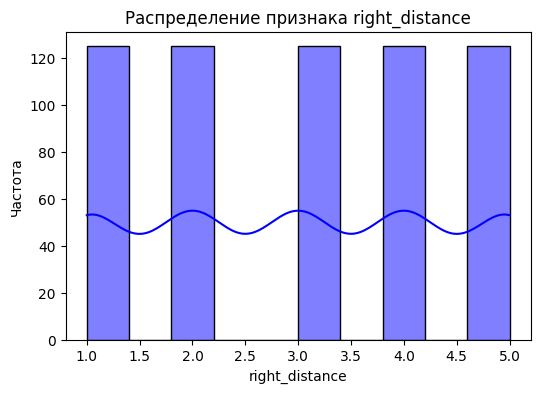

In [ ]:
# Построение гистограмм
for col in ['left_weight', 'left_distance', 'right_weight', 'right_distance']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f"Распределение признака {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()


## Шаг 8: Парные графики

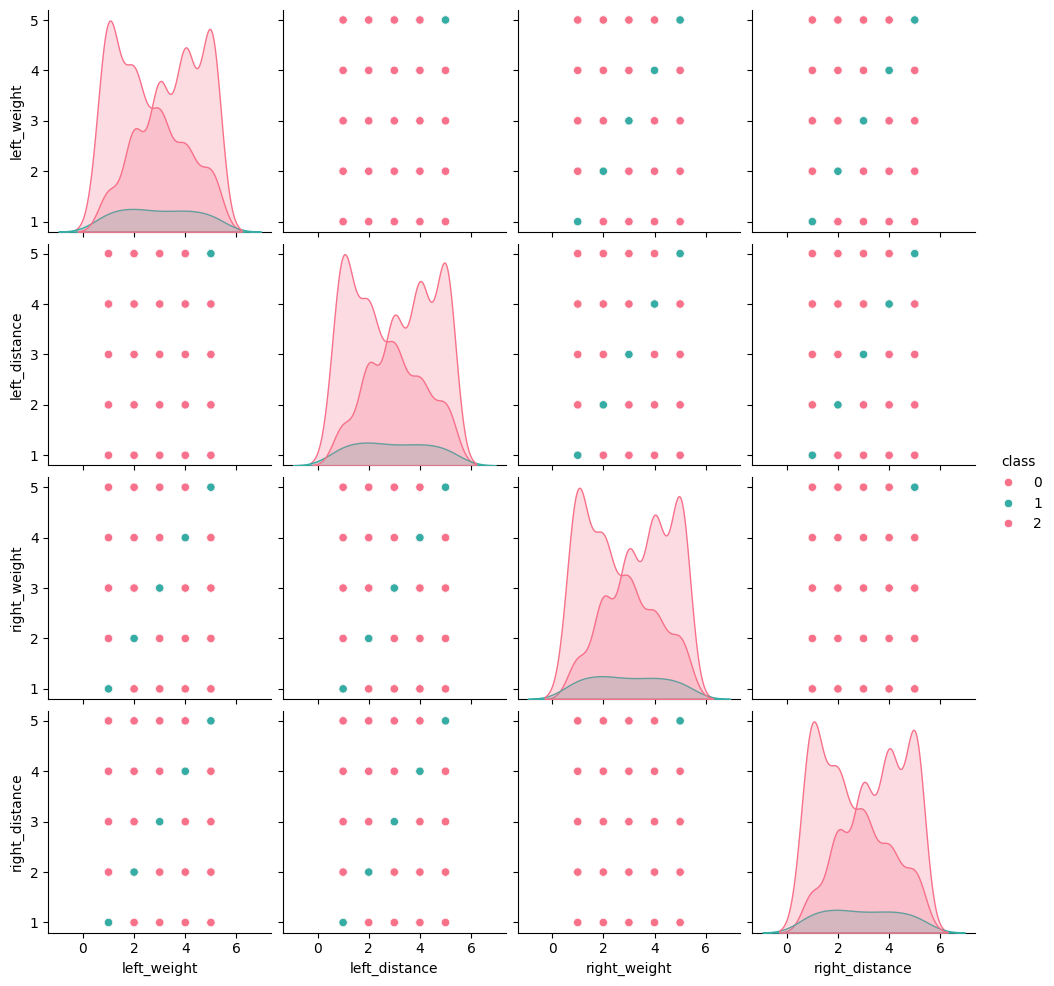

In [ ]:
# Построение парных графиков
sns.pairplot(data_numeric, hue='class', palette='husl')
plt.show()


## Вывод

1. Матрица корреляций показывает слабую связь между признаками. Это говорит о том, что признаки относительно независимы и могут быть полезны для моделей машинного обучения.
2. Распределение данных в некоторых признаках показывает явную тенденцию, что может указывать на взаимосвязь этих признаков с классами.
3. Парные графики демонстрируют, что классы можно разделить на основе комбинации признаков, однако в некоторых областях есть пересечения.
